In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import heapq

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

def cosine_distance(p1, p2):
    return 1 - np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2))

# Funkce pro vytvoření matice vzdáleností
def compute_distance_matrix(X, metric='euclidean'):
    n = len(X)
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            if metric == 'euclidean':
                distance_matrix[i, j] = distance_matrix[j, i] = euclidean_distance(X[i], X[j])
            elif metric == 'manhattan':
                distance_matrix[i, j] = distance_matrix[j, i] = manhattan_distance(X[i], X[j])
            elif metric == 'cosine':
                distance_matrix[i, j] = distance_matrix[j, i] = cosine_distance(X[i], X[j])

    return distance_matrix

def agglomerative_clustering(distance_matrix, linkage_type='single', num_clusters=1):
    n = distance_matrix.shape[0]
    clusters = [[i] for i in range(n)]

    while len(clusters) > num_clusters:
        min_dist = float('inf')
        cluster_to_merge = (-1, -1)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if linkage_type == 'single':
                    dist = min(distance_matrix[a, b] for a in clusters[i] for b in clusters[j])
                elif linkage_type == 'complete':
                    dist = max(distance_matrix[a, b] for a in clusters[i] for b in clusters[j])

                if dist < min_dist:
                    min_dist = dist
                    cluster_to_merge = (i, j)

        i, j = cluster_to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]

    return clusters

def get_cluster_labels(clusters, n_samples):
    labels = np.zeros(n_samples, dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
    return labels

def normalize(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# standardizace dat (průměr 0, standardní odchylka 1)
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)



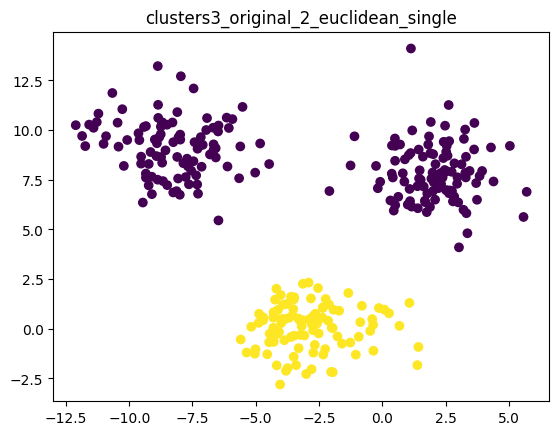

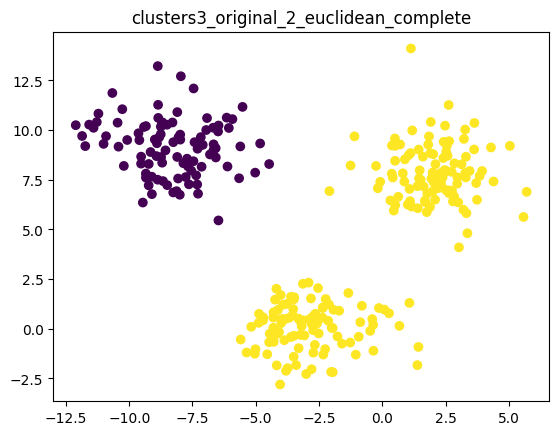

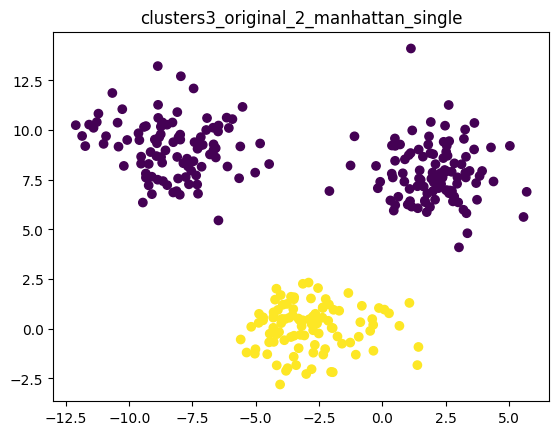

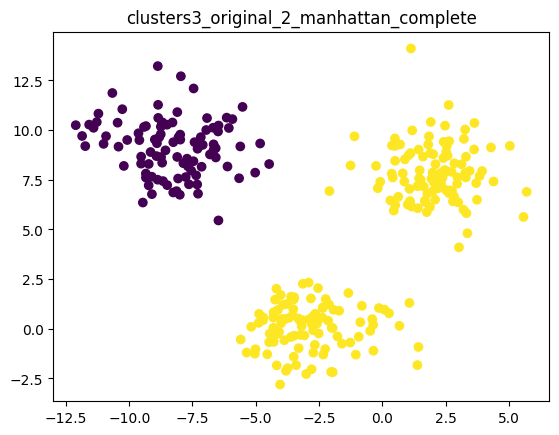

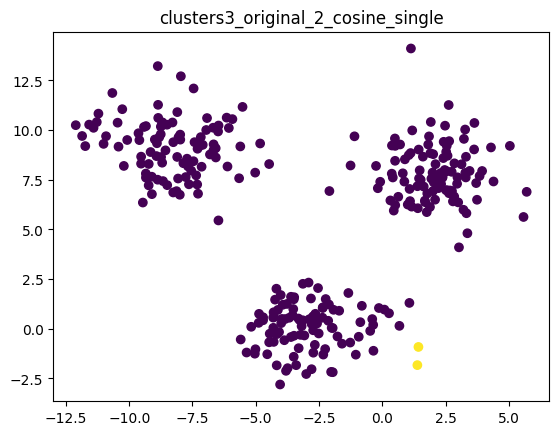

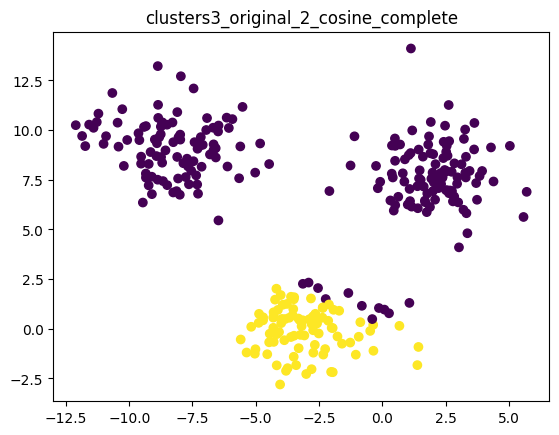

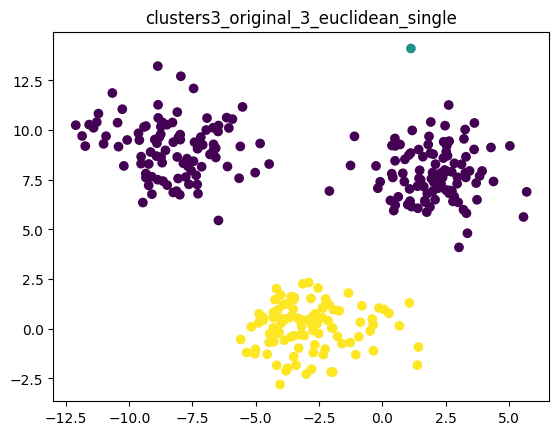

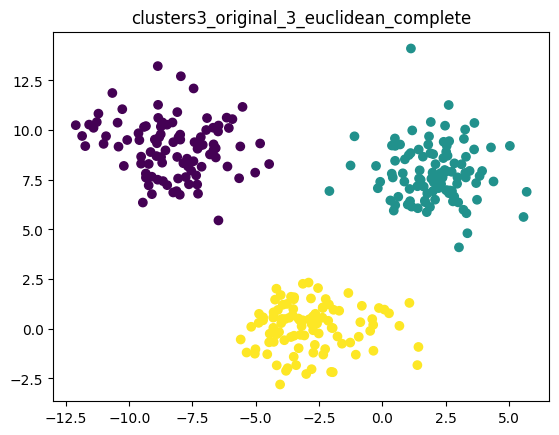

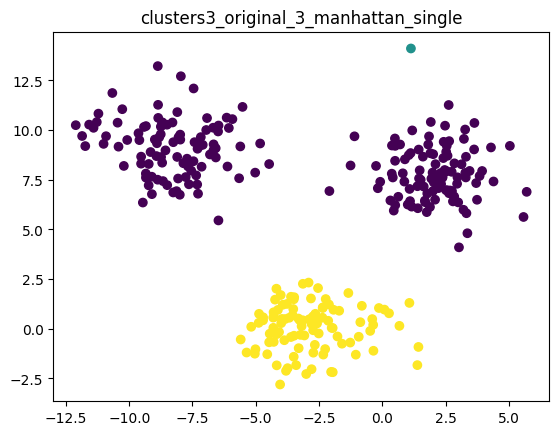

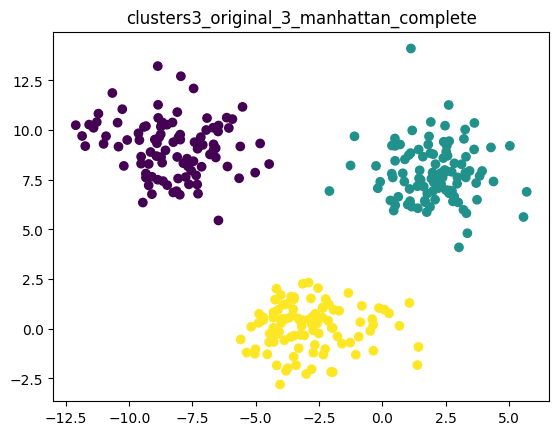

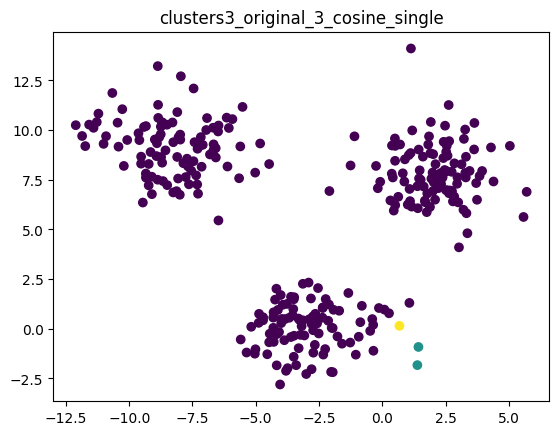

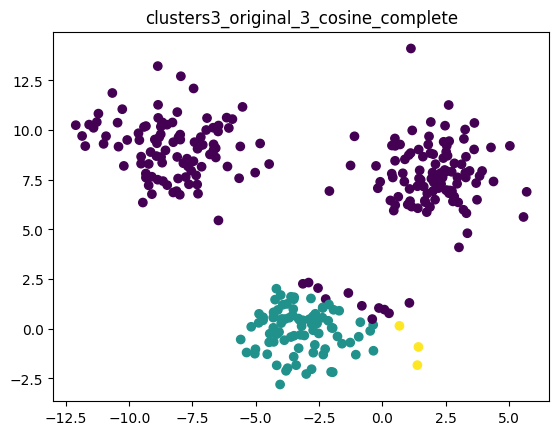

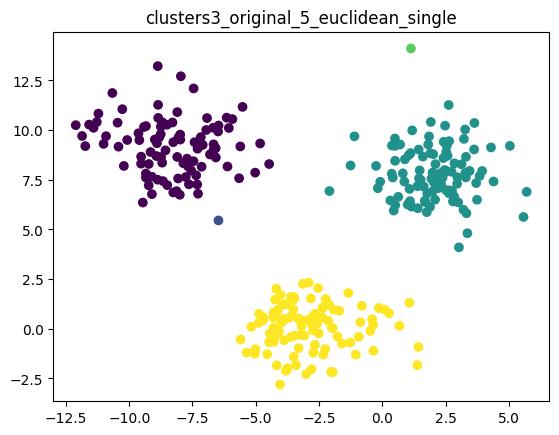

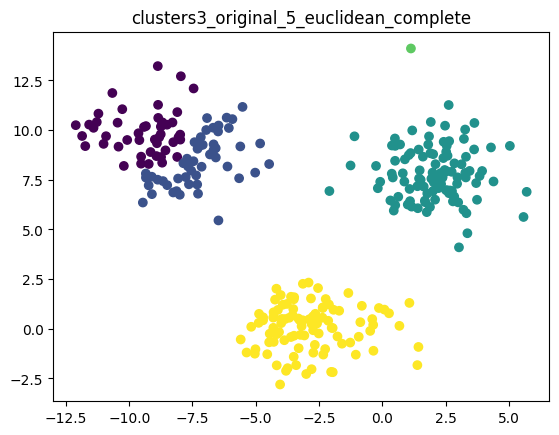

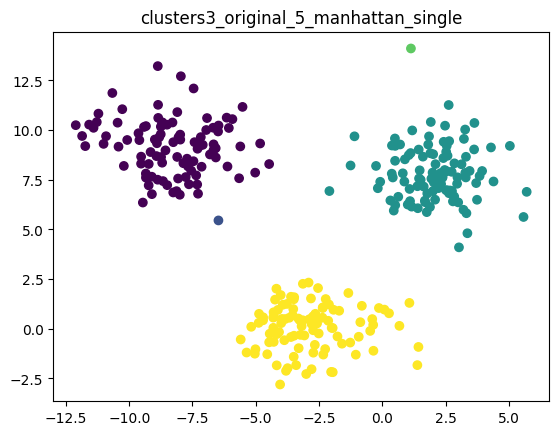

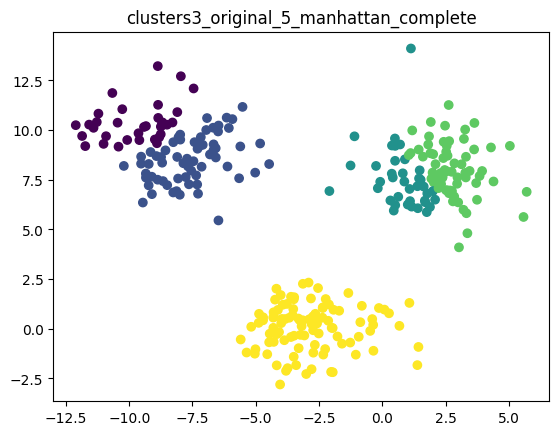

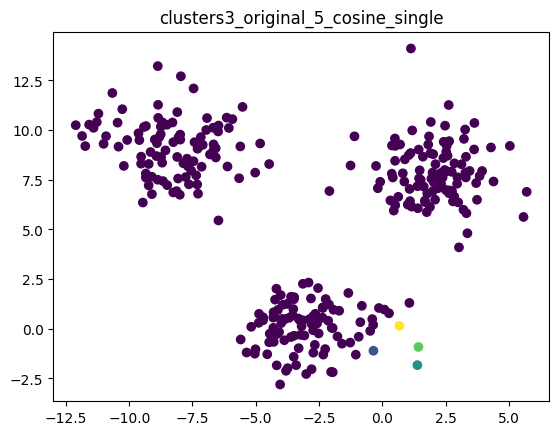

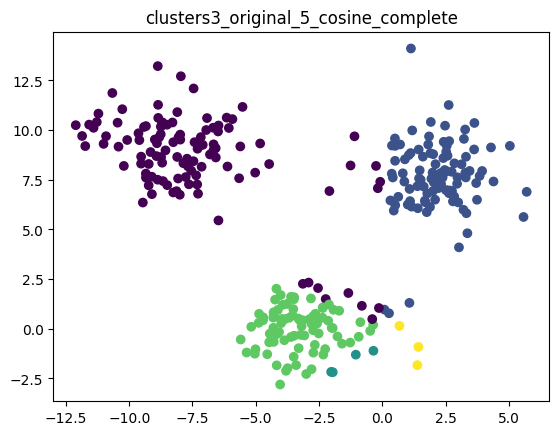

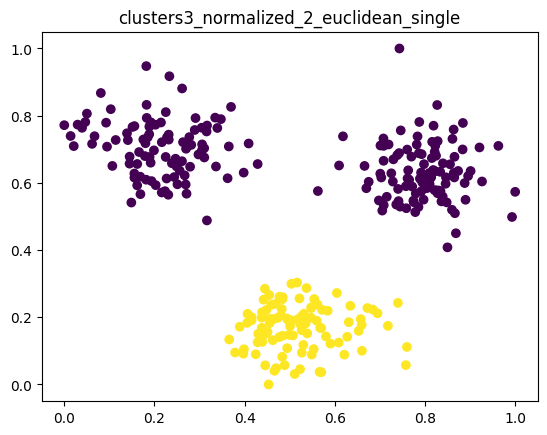

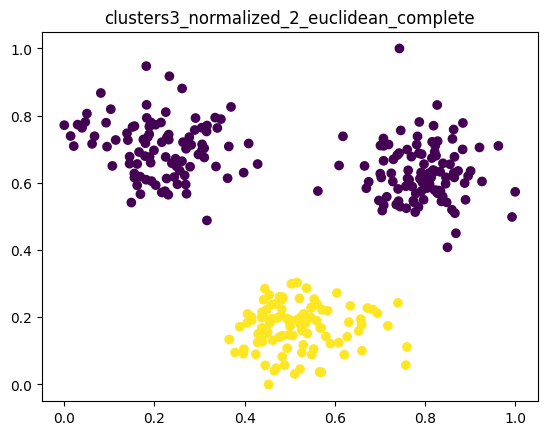

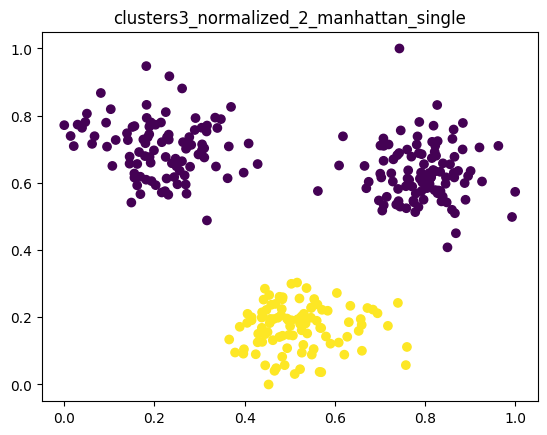

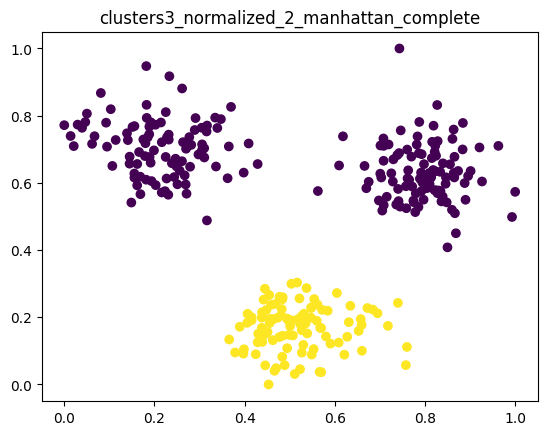

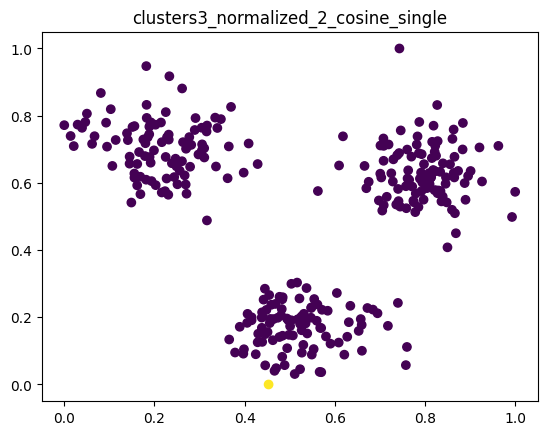

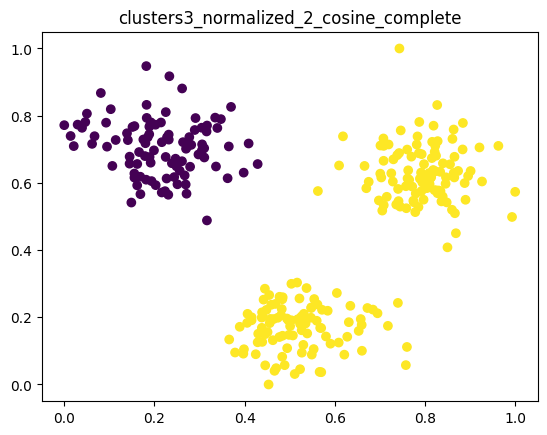

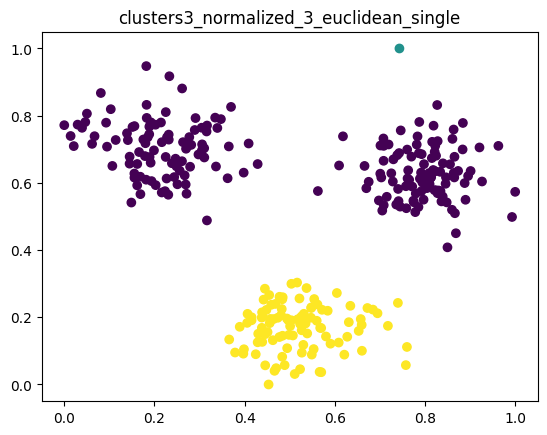

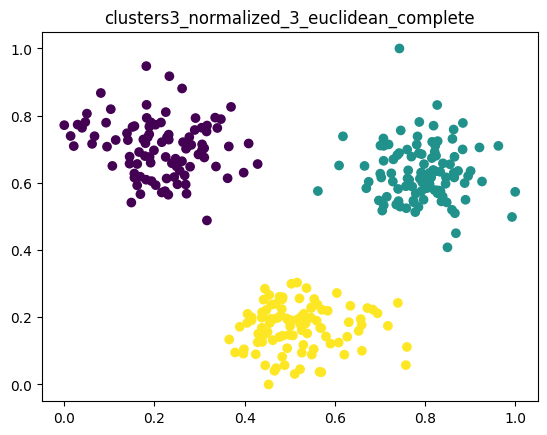

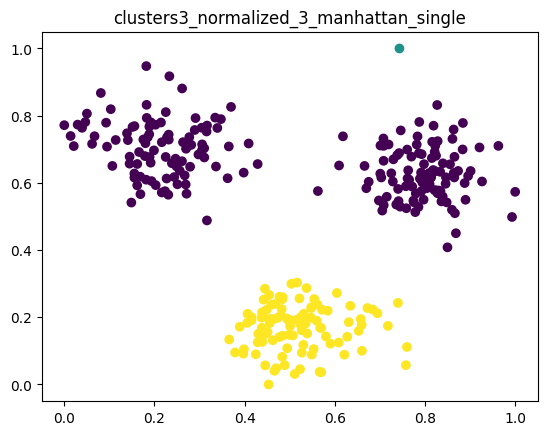

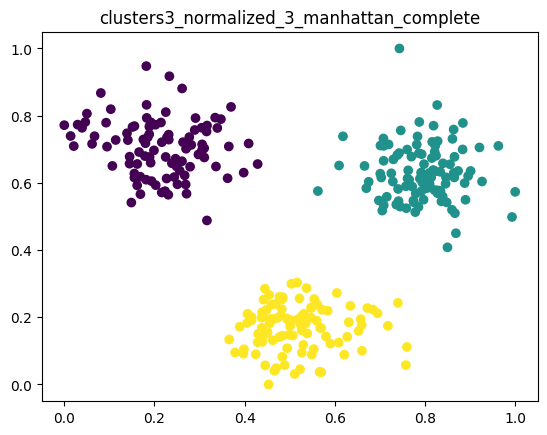

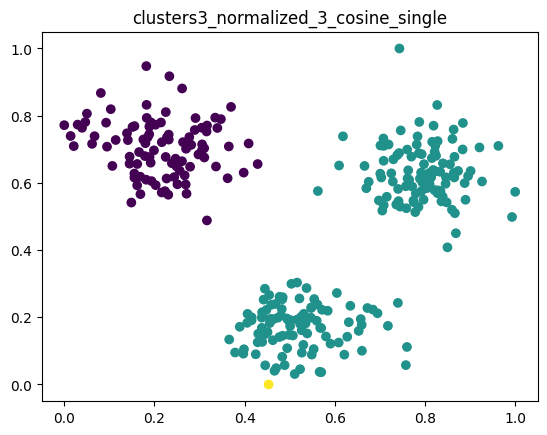

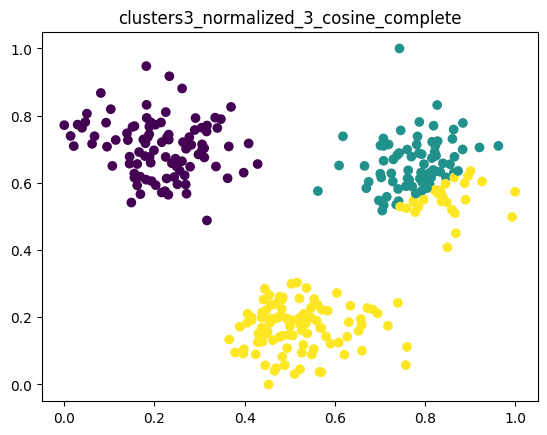

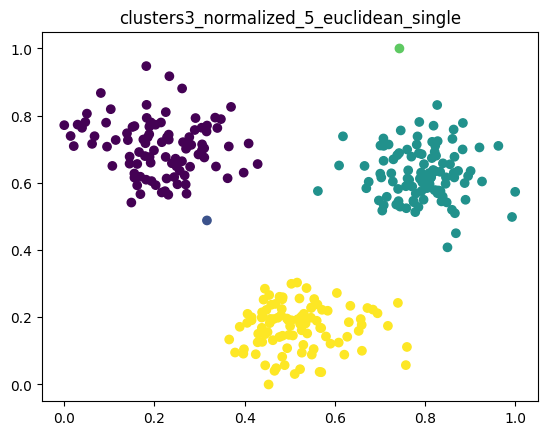

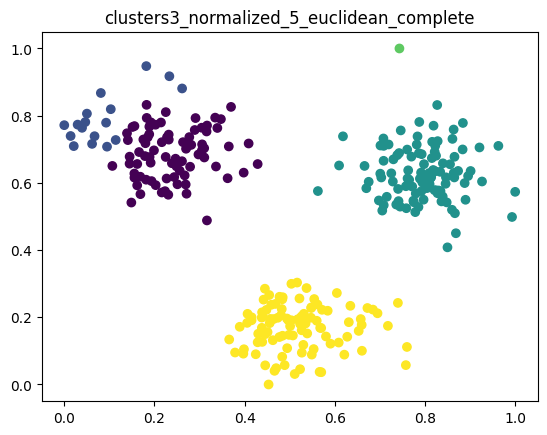

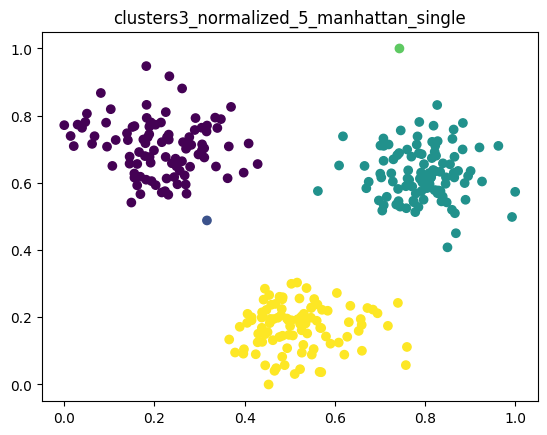

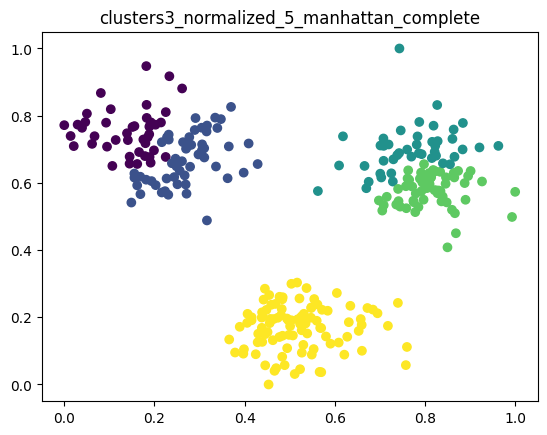

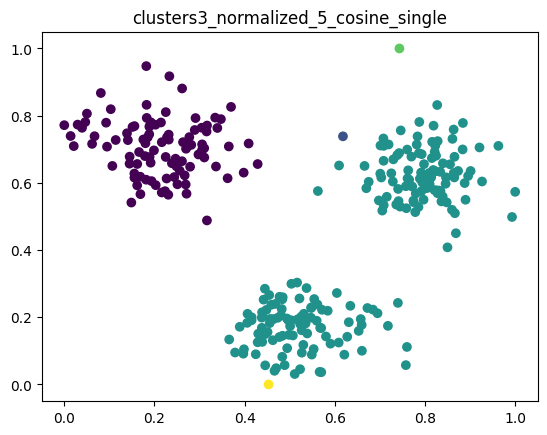

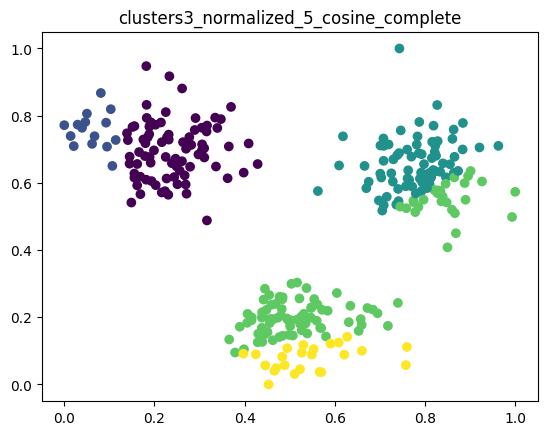

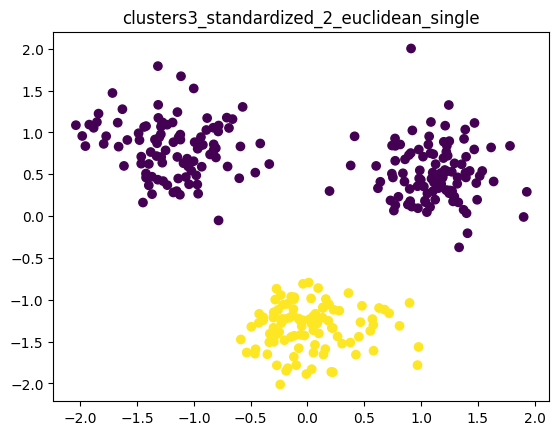

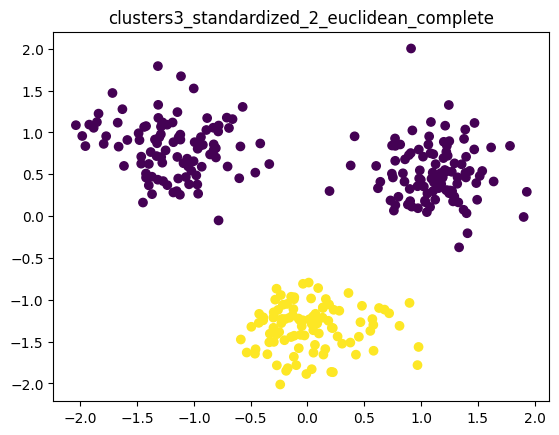

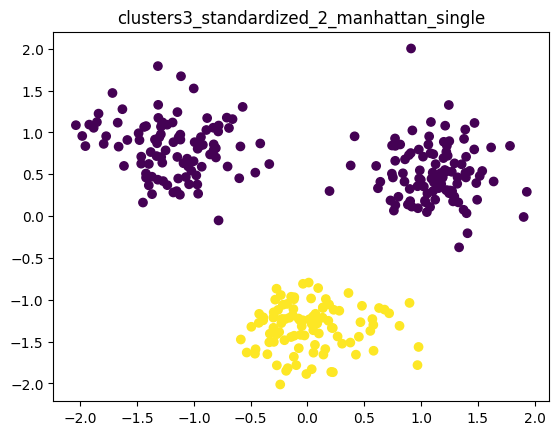

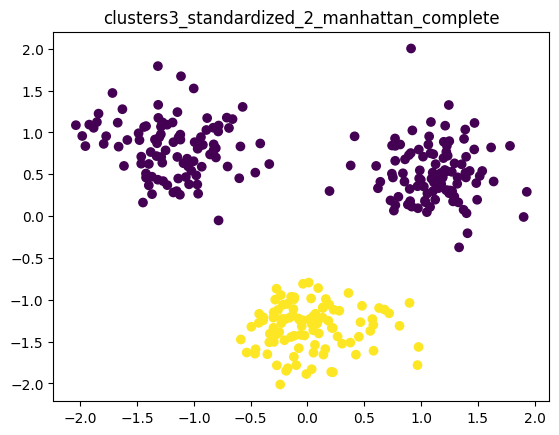

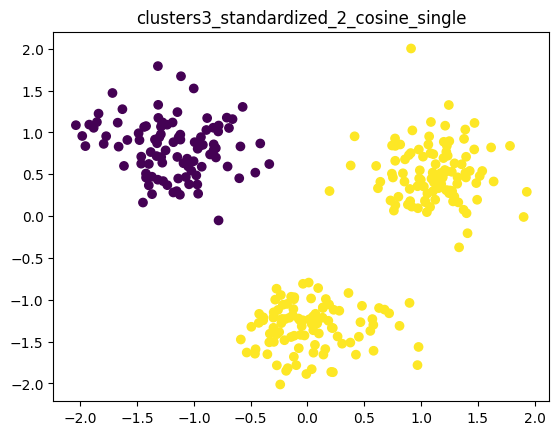

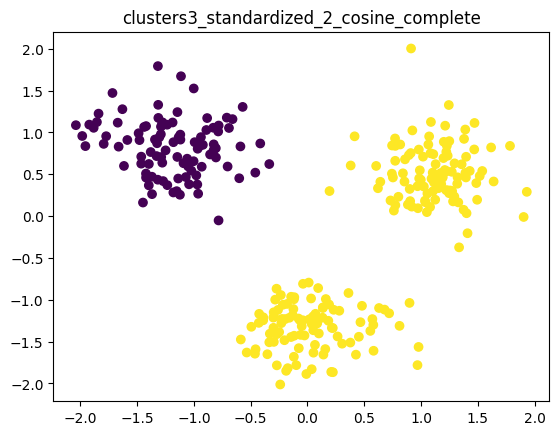

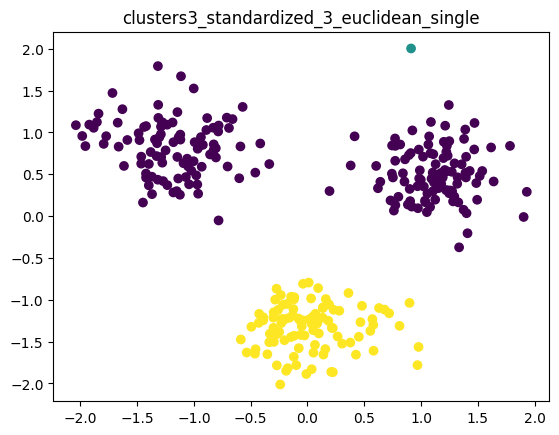

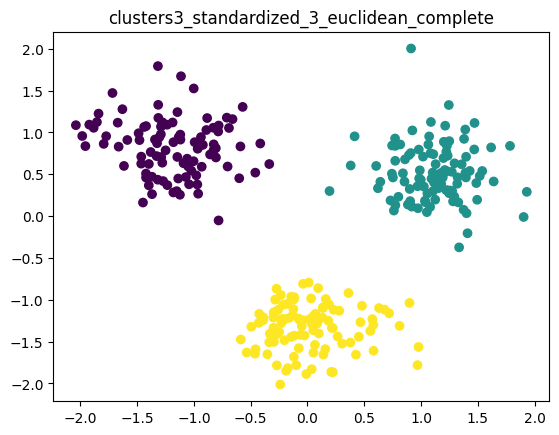

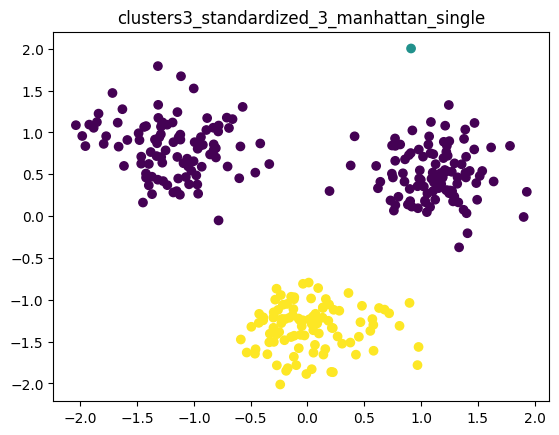

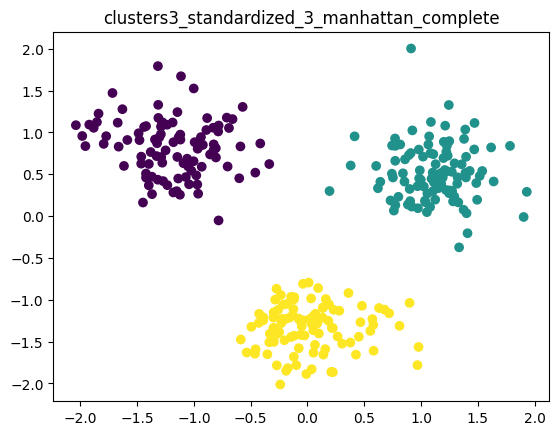

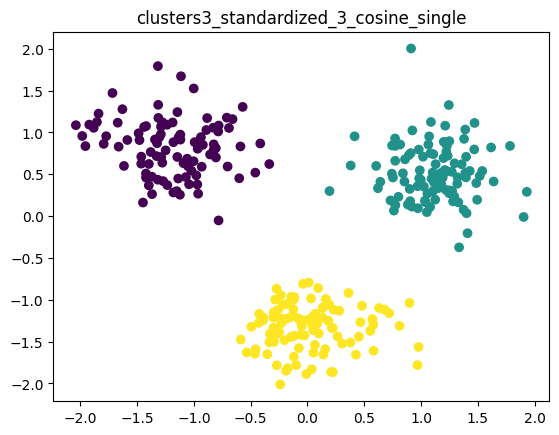

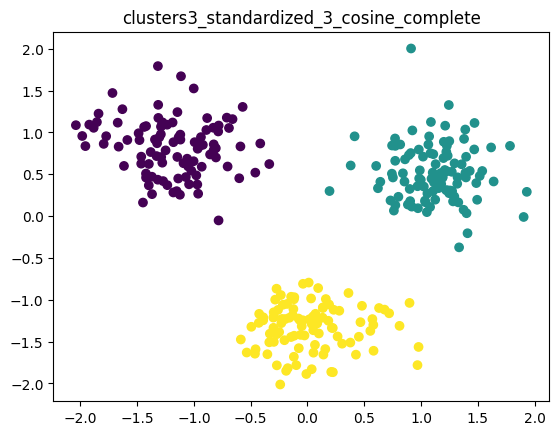

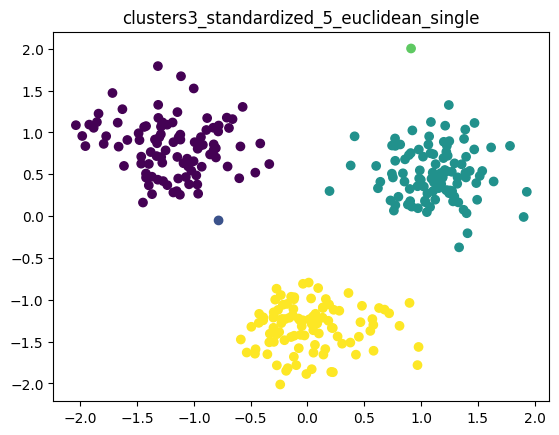

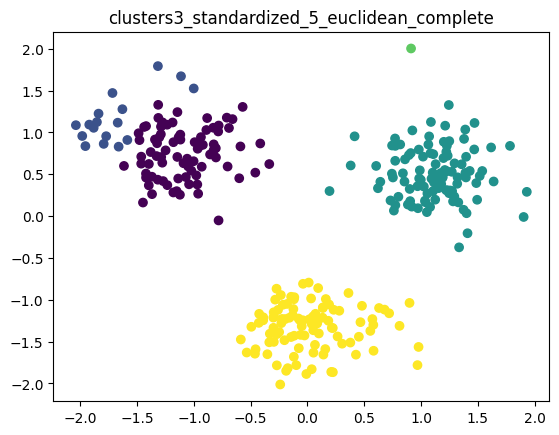

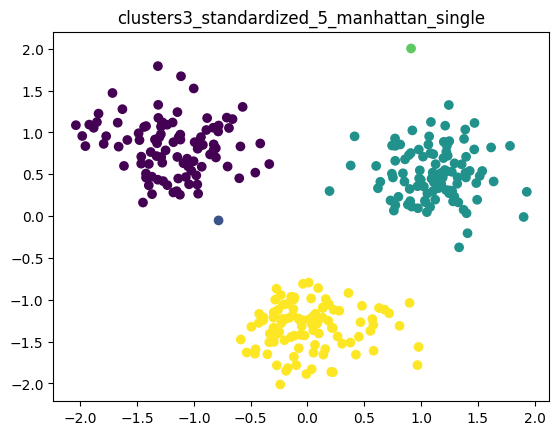

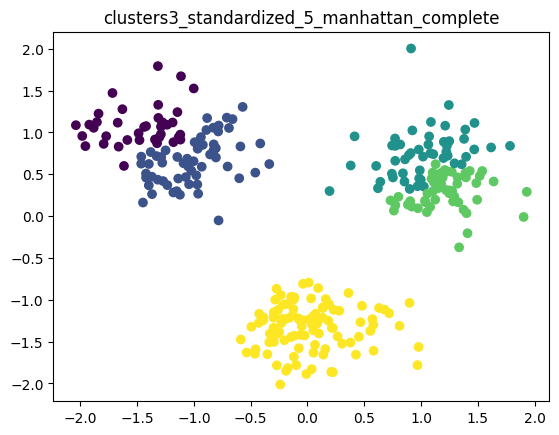

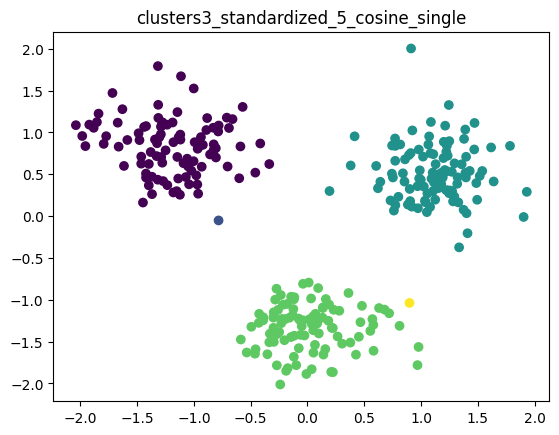

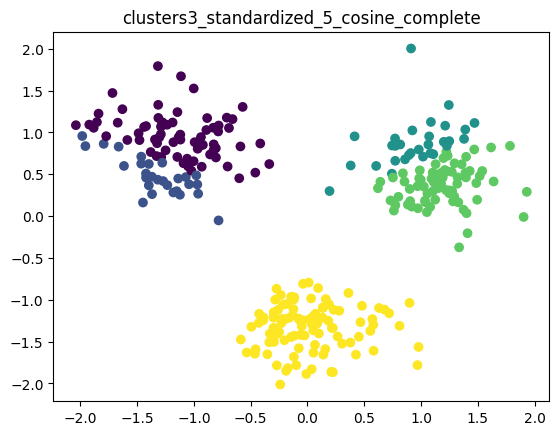

In [15]:
data_file = 'clusters3'
X = np.loadtxt(f'{data_file}.csv', delimiter=';')
n_samples = X.shape[0]

X_normalized = normalize(X)
X_standardized = standardize(X)

preprocessed_data = {'original': X, 'normalized': X_normalized, 'standardized': X_standardized}

distance_matrices = {}
for data_key, data in preprocessed_data.items():
    for metric in ['euclidean', 'manhattan', 'cosine']:
        key = f'{data_key}_{metric}'
        distance_matrices[key] = compute_distance_matrix(data, metric=metric)

for data_key in preprocessed_data.keys():
    for n_cluster in [2, 3, 5]:
        for metric in ['euclidean', 'manhattan', 'cosine']:
            for linkage in ['single', 'complete']:
                key = f'{data_key}_{metric}'

                distance_matrix = distance_matrices[key]

                clusters = agglomerative_clustering(distance_matrix, linkage_type=linkage, num_clusters=n_cluster)

                labels = get_cluster_labels(clusters, n_samples)
                plt.figure()
                plt.scatter(preprocessed_data[data_key][:, 0], preprocessed_data[data_key][:, 1], c=labels)
                plt.title(f'{data_file}_{data_key}_{n_cluster}_{metric}_{linkage}')
                # plt.savefig(f'clustering_output/{key}.png')
                plt.show()
                # plt.close()